In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nxcom

In [2]:
G = nx.read_edgelist('./data/mcauley2012/facebook_combined.txt')

In [3]:
len(G.nodes)

4039

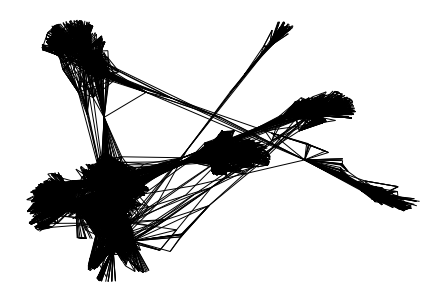

In [5]:
nx.draw(G, node_size=0)

### Objective: Identify and visualize the communities found.

In [6]:
communities = nxcom.greedy_modularity_communities(G)

In [7]:
len(communities)

13

### Side job: Auxiliary functions for setting and assigning color/community.

In [9]:
def set_node_community(G,communities):
    '''Add community attribute to the nodes'''
    for c, nodes_c in enumerate(communities):
        for node in nodes_c:
            G.nodes[node]['community'] = c + 1 # communities from 1 to len(communities)

In [10]:
def set_edge_community(G):
    '''Add community attribute to edges or 0 if external'''
    for v, w in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge! 
            G.edges[v,w]['community'] = G.nodes[v] ['community']
        else:
            # External edge, mark as zero
            G.edges[v,w]['community'] = 0 

In [15]:
# Small trick to generate color
def get_color(i):
    ''' Assign a color to community i'''
    n = 16 # palette capacity (=number of colors we can generate)
    low, high = 0.1, 0.9
    span = high-low
    r = low + span*((i+1)*3 % n )/(n-1)
    g = low + span*((i+1)*5 % n )/(n-1)                    
    b = low + span*((i+1)*7 % n )/(n-1) 
    return (r, g, b)

In [17]:
# Set node and edge community values
set_node_community(G, communities)
set_edge_community(G)

In [18]:
# Set colors for interal and external edges
external = [(v,w) for v, w in G.edges if G.edges[v,w]['community'] == 0 ]
internal = [(v,w) for v, w in G.edges if G.edges[v,w]['community'] > 0 ]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

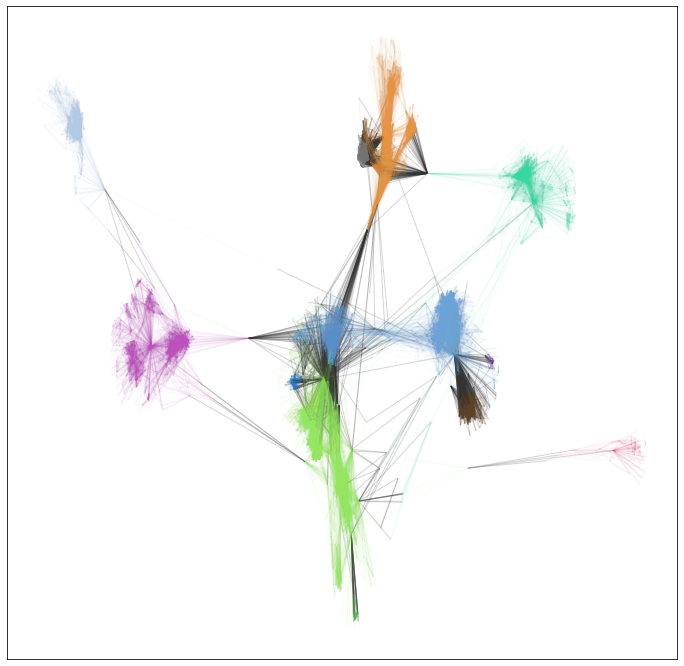

In [23]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
# External edges
nx.draw_networkx(G, pos=pos, node_size=0
                 , edgelist=external, edge_color="#333333", alpha=0.2, with_labels=False)
# Internal edges
nx.draw_networkx(G, pos=pos, node_size=0
                 , edgelist=internal, edge_color=internal_color, alpha=0.05, with_labels=False)

## K-cores

- Eliminate nodes that have less than $k$ connections to others.

In [30]:
G_core_ = nx.k_core(G, k=10)

In [31]:
len(G_core_.nodes)

2987

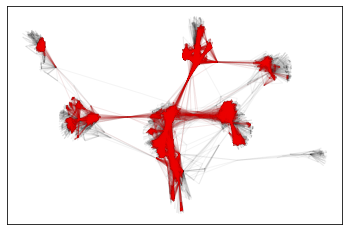

In [32]:
# Compare core against original graph
nx.draw_networkx(G, pos=pos, node_size=0, edge_color='#333333', alpha=0.05, with_labels=False)
nx.draw_networkx(G_core_, pos=pos, node_size=0, edge_color='red', alpha=0.05, with_labels=False)